## 4.1 Basics of Functions
each function defintion has the form:

    return-type function-name(argument declarations)
    {
        declarations and statements
    }

various parts may be absent, a minimal function is:

    dummy() {}

- which does nothing, a do nothing function like this is sometimes useful as a placeholder during program development
- if the return type is ommited, int is assumed

A program is just a set of definitions of variables and functions. Communication between the functions is by arguments and values returned by the functions, and through external variables.
The functions can occur in any order in the source file, and the source program can be split into multiple functions, as long as no function is split.

the `return` statement is the mechanism for returning a value from the called function to its caller. Any expression can follow return

## 4.3 External Variables
A C program consists of a set of external objects, which are either variables or functions.
- external is in contrast to internal which describes the arguments & vars described in funcs
- external vars are described outside any function & are available to many functions
- functions themselves are always external bc C doesn't allow functions to be descibed inside other functions
- by default, external vars & funcs have the property that all refs to them by the same name, even from functions compiled seperately are references to the same thing (note; this property is called external linkage)

because external variables are globally accessible they provide an alternative to function arguments and return values for communicating data between functions.
- any function may access any external variable by name, if the name has been declared somehow
- if a large num of vars must be shared among funcs, external vars are more convenient & efficient than long argument lists
    - note; use with some caution as this may have a bad effect on program structure & lead to programs with too many data connections between function

## 4.4 Scope Rules
The functions and external variables that make up a C function don't need to be compiled all at the same time
- the source text of the program may be kept in several files, & previously compiled routines may be loaded from libraries.

declaration of an external variable vs its definition
- a declaration announces properties of a variable
- a definition also causes storage to be set aside


## 4.5 Header Files
larger programs are divided into several source files
- the definitions & declarations are shared among the files - want to centralize this as much as possible so that there is only one copy to get and keep right as the program evolves
- we can place this common material in a **header** file (eg: `calc.h`)

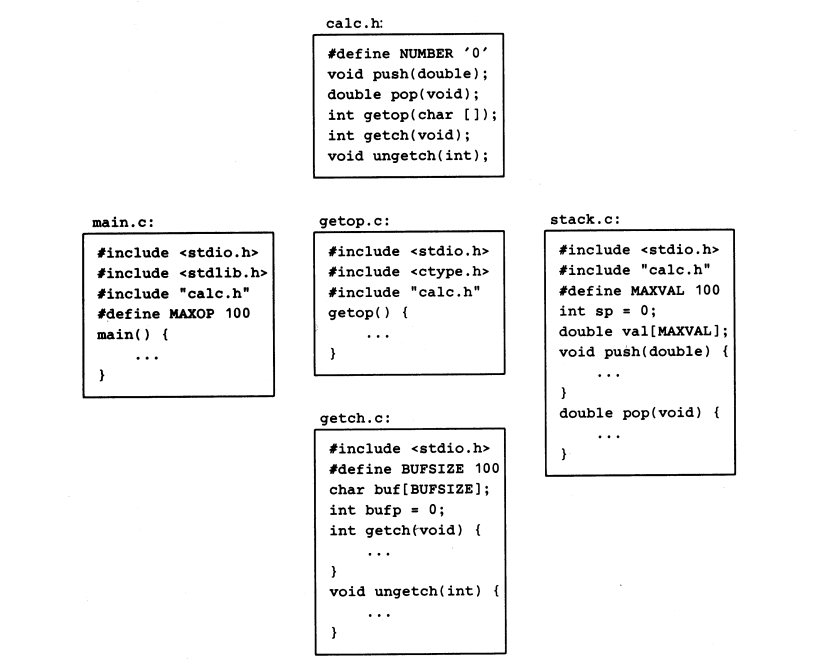

There's a tradeoff between each file having access to only the info it needs & the reality that it's harder to maintain more header files
- for a moderately sized program it's probably best to have 1 header file that contains everything that is to be shared
- more organization and headers needed for a larger program

## 4.6 Static Variables
static storage is specified by prefixing the normal declaration with the word `static`

normally function names are global, visible to any part of the entire program. if a function is declared `static` however it's name is invisible outside of the file in which it is declared.

## 4.7 Register Variables
a `register` declaration advices the compiler that the variable in question will be heavily used
- idea; to be placed in machine registers, which may result in smaller faster programs, but compilers are free to ignore the advice

    register int x;
OR

    f(register unsigned m, register long n)
    {
        register int i;
        ...
    }


## 4.8 Block Structure
C is NOT a block structured language - functions cannot be defined inside other functions
- however variables can be defined inside a function in a block-structured fashion

## 4.9 Initialization
For external & static variables, the intializer must be a constant expression; the intialization is done once, before the program begins execution.

For automatic & register variables it is done each time the function or block is entered
- the initializer is not restricted to being a constant; it may any expression involving previously defined values, even function calls

eg: can initialize an array `days` with the number of days in each month:

    int days[] = { 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31 };

- when the size of the array is ommited the compiler will compute the len by counting the num of initializers

character arrays are a special case of intialization, a string may be used instead of braces & comma notation:

    char pattern[] = "ould";
instead of:    

    char pattern[] = { 'o', 'u', 'l', 'd', '\0' };

 

## 4.11 The C Preprocessor
the first 2 frequently used features:
- #include - to include the contents of a file during compilation
- #define - to replace a token by an arbitrary sequence of characters


## 4.11.2 Macro Substitution
##### 1. Defining Macros
   - Macros are defined using the `#define` directive. For instance:
     ```c
     #define PI 3.14159
     ```
     This replaces every occurrence of `PI` with `3.14159` in the code.

##### 2. Macros with Arguments
   - Macros can take arguments, making them versatile and reusable. Example:
     ```c
     #define SQUARE(x) ((x) * (x))
     ```
     This expands `SQUARE(5)` to `((5) * (5))`. Note that parentheses around `x` are essential to avoid unexpected results due to operator precedence.

##### 3. Advantages of Macros
   - Macros can enhance readability and reduce hardcoding. Since macros are expanded inline, they may also reduce the function call overhead, potentially leading to more efficient code.

##### 4. Limitations and Cautions
   - Macros don’t offer type-checking, which can lead to unexpected results. For example, using `SQUARE(x + 1)` without proper parentheses could yield unintended behavior due to the evaluation order of `x + 1`.
   - Debugging macro expansions can be challenging since errors occur after text substitution, unlike with functions.##

### 4.11.3 Conditional Inclusion

    #if !defined(HDR)
    #define HDR

    /* contents of hdr.h go here */

    #endif

OR

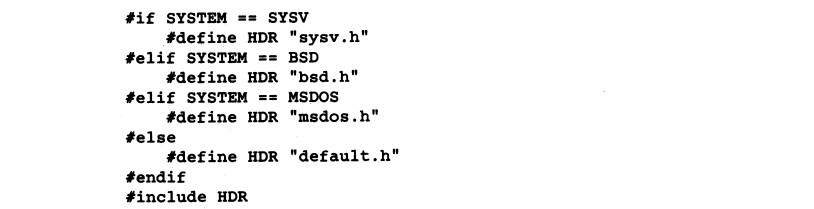

The #ifdef and #ifndef lines are specialized forms that test whether a name is defined. The first example of `#if` above could have been written:

    #ifndef HDR
    #define HDR

    /* contents of hdr.h go here */

    #endif